In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

ValueError: num must be an integer with 1 <= num <= 4, not 5

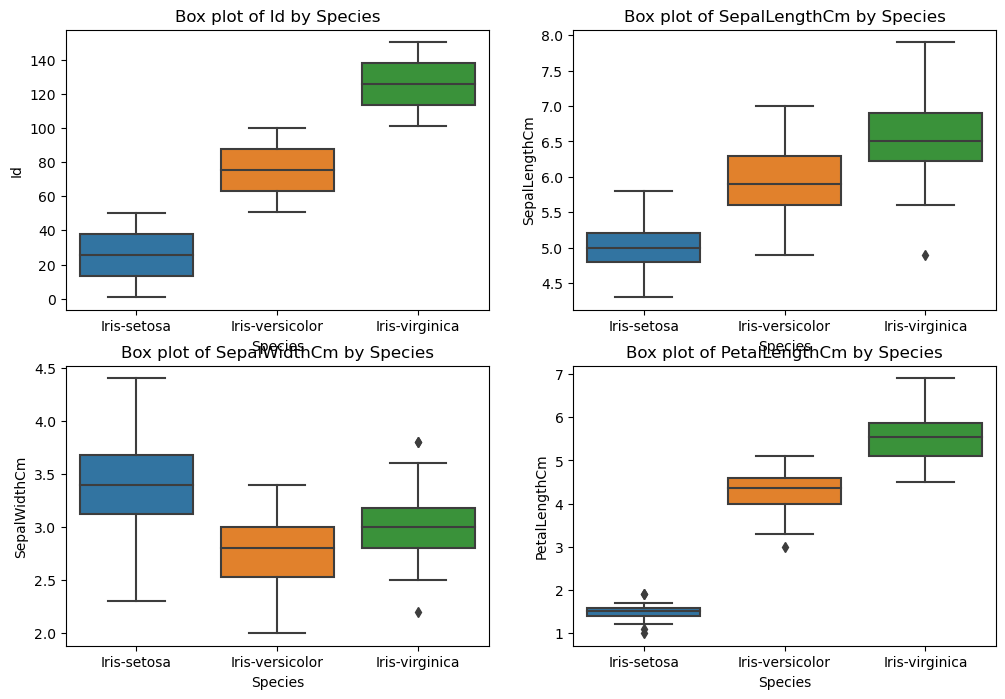

In [9]:
#data visualization
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=column, data=df)
    plt.title(f'Box plot of {column} by Species')
plt.tight_layout()
plt.show()


In [14]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 1.00


In [19]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


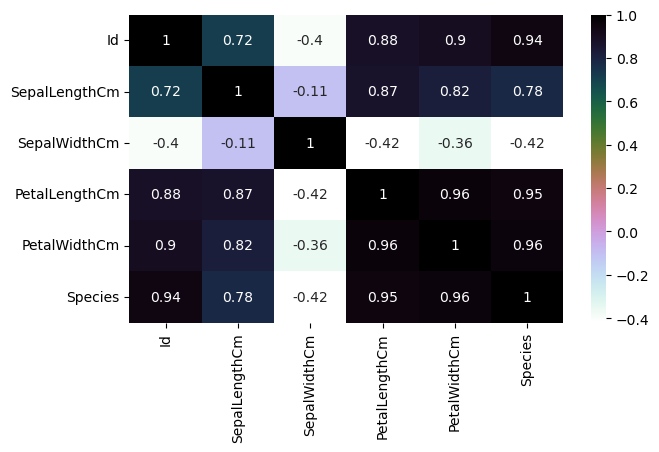

In [13]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df['Species'])
df['Species']=le.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [14]:
#define x variable 
x = df.iloc[:,:-1]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [15]:
#define y variable
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [17]:
#create train and test data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=20)

In [20]:
xtrain.shape


(105, 5)

In [21]:
ytrain.shape


(105,)

In [22]:
xtest.shape


(45, 5)

In [23]:
ytest.shape

(45,)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
logi = LogisticRegression()
logi.fit(xtrain,ytrain)
logi_prediction = logi.predict(xtest)
logi_prediction

C:\Users\Vedha\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1,
       1])

In [25]:
print(logi.score(xtrain,ytrain)*100)
print(logi.score(xtest,ytest)*100)

100.0
100.0


In [26]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion='gini',
    splitter='best', 
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1,
    random_state=1,
    max_leaf_nodes=2,
    class_weight='balanced',
    ccp_alpha=0.01,)
tree_classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=5,
                       max_features=1, max_leaf_nodes=2, random_state=1)

In [27]:
tree_classifier.score(xtrain,ytrain)

0.5714285714285714

In [28]:
tree_classifier.predict(xtest)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0])

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
tree_pred=tree_classifier.predict(xtest)
confusion_matrix(ytest,tree_pred)

array([[ 8,  5,  0],
       [ 4, 14,  0],
       [ 1, 13,  0]], dtype=int64)

In [31]:
print(classification_report(ytest,tree_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.44      0.78      0.56        18
           2       0.00      0.00      0.00        14

    accuracy                           0.49        45
   macro avg       0.35      0.46      0.39        45
weighted avg       0.35      0.49      0.40        45



C:\Users\Vedha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vedha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vedha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1)

In [34]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [35]:
knn.score(xtrain,ytrain)

1.0

In [38]:
knn_pred=knn.predict(xtest)
confusion_matrix(ytest,knn_pred)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [39]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [40]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=300,criterion='gini',
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes=2,
    min_impurity_decrease=0.1,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=1,
    ccp_alpha=0.01,
    max_samples=3)
RFC.fit(xtrain,ytrain)

RandomForestClassifier(ccp_alpha=0.01, max_depth=17, max_leaf_nodes=2,
                       max_samples=3, min_impurity_decrease=0.1,
                       n_estimators=300, n_jobs=-1, random_state=1)

In [41]:
RFC.score(xtrain,ytrain)
RFC.score(xtest,ytest)
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'max_leaf_nodes': 2,
 'max_samples': 3,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [44]:
RFC_pred = RFC.predict(xtest)
accuracy_score(ytest,RFC_pred)
confusion_matrix(ytest,RFC_pred)


array([[13,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 13]], dtype=int64)

In [43]:
print(classification_report(ytest,RFC_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.89      0.91        18
           2       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

